Filtered rows: 459


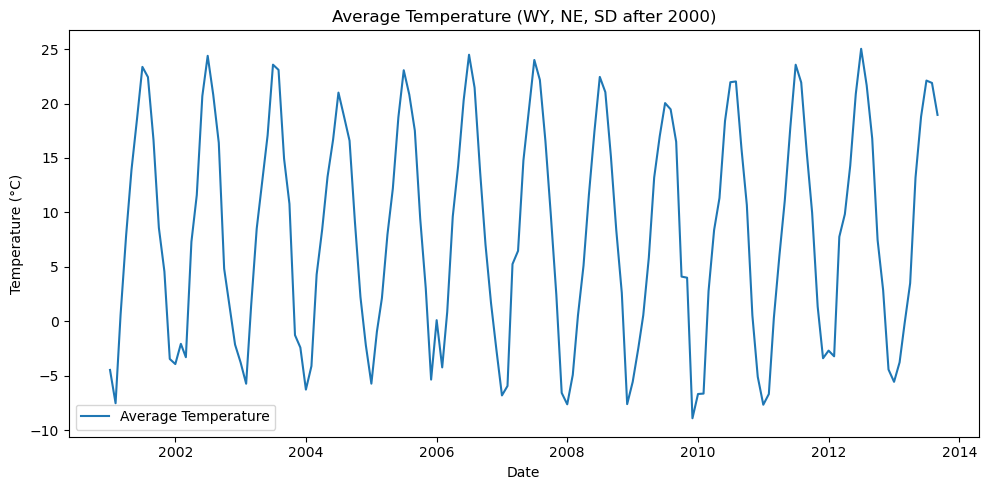

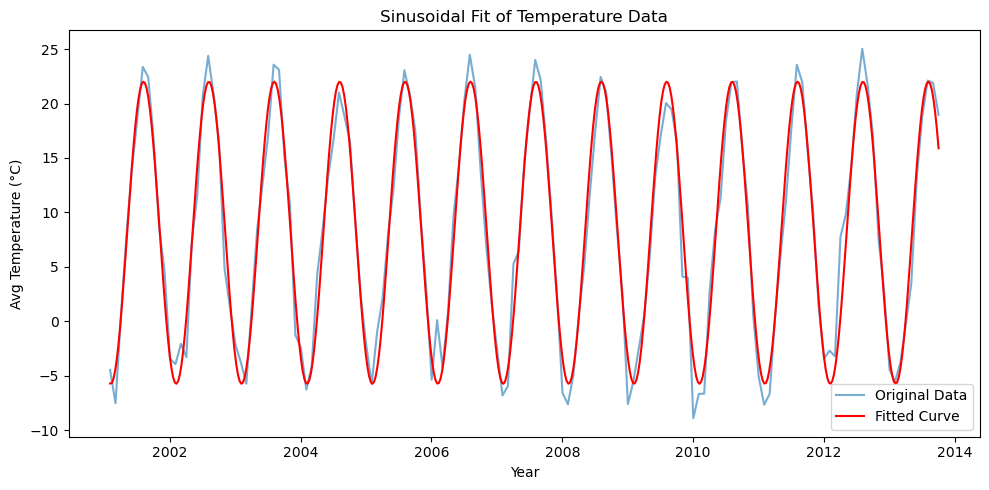

Fitted Parameters and Errors:
a = -13.8835 ± 0.2263
b = 6.2831 ± 0.0045
c = -0.4343 ± 9.0231
d = 8.1278 ± 0.1605

Final Equation:
T(x) = -13.88 * cos(6.28 * x + -0.43) + 8.13


In [22]:
#1.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from datetime import datetime
from astropy.table import Table

# 1.1
df = pd.read_csv("GlobalLandTemperaturesByState.csv")
df = df[['dt', 'AverageTemperature', 'State']]
df['dt'] = pd.to_datetime(df['dt'])

# Drop missing temperature values
df = df.dropna(subset=['AverageTemperature'])

# Filter for year > 2000 and 3 target states
df = df[df['dt'].dt.year > 2000]
df = df[df['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]

print("Filtered rows:", df.shape[0])

#1.2
avg_temp_df = df.groupby('dt')['AverageTemperature'].mean().reset_index()
avg_temp_df.rename(columns={'AverageTemperature': 'AvgTemp'}, inplace=True)
avg_temp_df.head()

#1.3
plt.figure(figsize=(10, 5))
plt.plot(avg_temp_df['dt'], avg_temp_df['AvgTemp'], label="Average Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Average Temperature (WY, NE, SD after 2000)")
plt.legend()
plt.tight_layout()
plt.show()

#1.4
def date_to_float(d):
    return d.year + d.month / 12 + d.day / 365

avg_temp_df['date_num'] = avg_temp_df['dt'].apply(date_to_float)
avg_temp_df.head()

#1.5
def seasonal_model(x, a, b, c, d):
    return a * np.cos(b * x + c) + d

initial_guess = [10, 2 * np.pi, 0, avg_temp_df['AvgTemp'].mean()]

#1.6
params, cov = curve_fit(seasonal_model, avg_temp_df['date_num'], avg_temp_df['AvgTemp'], p0=initial_guess)

#1.7
x_vals = np.linspace(avg_temp_df['date_num'].min(), avg_temp_df['date_num'].max(), 500)
y_fit = seasonal_model(x_vals, *params)

plt.figure(figsize=(10, 5))
plt.plot(avg_temp_df['date_num'], avg_temp_df['AvgTemp'], label="Original Data", alpha=0.6)
plt.plot(x_vals, y_fit, label="Fitted Curve", color='red')
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.title("Sinusoidal Fit of Temperature Data")
plt.legend()
plt.tight_layout()
plt.show()

#1.8
errors = np.sqrt(np.diag(cov))

#1.9
param_names = ['a', 'b', 'c', 'd']
print("Fitted Parameters and Errors:")
for name, val, err in zip(param_names, params, errors):
    print(f"{name} = {val:.4f} ± {err:.4f}")

print("\nFinal Equation:")
print(f"T(x) = {params[0]:.2f} * cos({params[1]:.2f} * x + {params[2]:.2f}) + {params[3]:.2f}")



In [24]:
def date_to_float(d):
    return d.year + d.month / 12 + d.day / 365

avg_temp_df['date_num'] = avg_temp_df['dt'].apply(date_to_float)
avg_temp_df.head()


,dt,AvgTemp,date_num
0,2001-01-01,-4.480333,2001.086073
1,2001-02-01,-7.541000,2001.169406
2,2001-03-01,0.590333,2001.252740
3,2001-04-01,7.889000,2001.336073
4,2001-05-01,13.908667,2001.419406


In [26]:
# Define a sinusoidal model
def seasonal_model(x, a, b, c, d):
    return a * np.cos(b * x + c) + d

# Initial guess: [amplitude, frequency, phase, offset]
initial_guess = [10, 2 * np.pi, 0, avg_temp_df['AvgTemp'].mean()]

# Curve fitting
params, cov = curve_fit(seasonal_model, avg_temp_df['date_num'], avg_temp_df['AvgTemp'], p0=initial_guess)

params


array([-13.88352885,   6.28309806,  -0.43433994,   8.12781467])

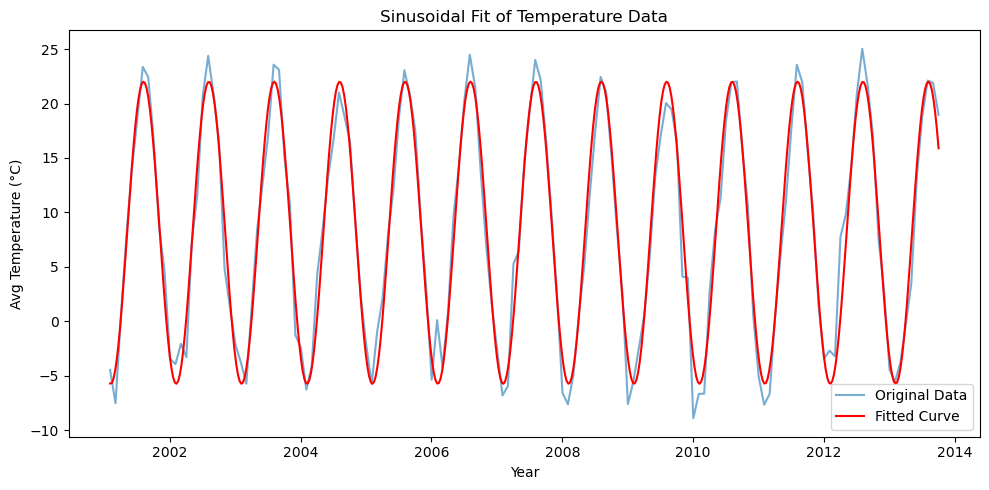

In [28]:
x_vals = np.linspace(avg_temp_df['date_num'].min(), avg_temp_df['date_num'].max(), 500)
y_fit = seasonal_model(x_vals, *params)

plt.figure(figsize=(10, 5))
plt.plot(avg_temp_df['date_num'], avg_temp_df['AvgTemp'], label="Original Data", alpha=0.6)
plt.plot(x_vals, y_fit, label="Fitted Curve", color='red')
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.title("Sinusoidal Fit of Temperature Data")
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
errors = np.sqrt(np.diag(cov))
param_names = ['a', 'b', 'c', 'd']

print("Fitted Parameters and Errors:")
for name, val, err in zip(param_names, params, errors):
    print(f"{name} = {val:.4f} ± {err:.4f}")

print("\nFinal Equation:")
print(f"T(x) = {params[0]:.2f} * cos({params[1]:.2f} * x + {params[2]:.2f}) + {params[3]:.2f}")


Fitted Parameters and Errors:
a = -13.8835 ± 0.2263
b = 6.2831 ± 0.0045
c = -0.4343 ± 9.0231
d = 8.1278 ± 0.1605

Final Equation:
T(x) = -13.88 * cos(6.28 * x + -0.43) + 8.13


In [40]:
from astropy.table import Table

t = Table.read("/Users/diana/python_decal/diana_decal/global_CCl4_MM.dat",
               format='ascii',
               delimiter=' ',       # whitespace-delimited
               guess=False,
               fast_reader=False)
df_gas = t.to_pandas()
print(df_gas.columns)
df_gas.columns
df_gas.head()
print(df_gas.head())
df_gas = df_gas[['CCl4ottoyr', 'CCl4ottomon', 'CCl4ottoGLm', 'CCl4ottoGLsd']]
df_gas.columns = ['year', 'month', 'mean_conc', 'std_dev']


# Combine year and month into a float date (e.g., 1996.25 for March)
df_gas['date'] = df_gas['year'] + (df_gas['month'] - 1) / 12

# Drop any rows with NaN values (optional, but likely necessary)
df_gas = df_gas.dropna()

# Final check
df_gas = df_gas[['date', 'mean_conc', 'std_dev']]
df_gas.head()


#df_gas.columns = ['date', 'mean_conc', 'std_dev']
df_gas.head()


Index(['CCl4ottoyr', 'CCl4ottomon', 'CCl4ottoNHm', 'CCl4ottoNHsd',
       'CCl4ottoSHm', 'CCl4ottoSHsd', 'CCl4ottoGLm', 'CCl4ottoGLsd'],
      dtype='object')
   CCl4ottoyr  CCl4ottomon  CCl4ottoNHm  CCl4ottoNHsd  CCl4ottoSHm  \
0        1996            1          NaN           NaN          NaN   
1        1996            2          NaN           NaN          NaN   
2        1996            3          NaN           NaN          NaN   
3        1996            4      105.318         0.197      102.969   
4        1996            5      105.032         0.193      102.754   

   CCl4ottoSHsd  CCl4ottoGLm  CCl4ottoGLsd  
0           NaN          NaN           NaN  
1           NaN          NaN           NaN  
2           NaN          NaN           NaN  
3         0.238      104.144         0.155  
4         0.287      103.893         0.174  


,date,mean_conc,std_dev
3,1996.250000,104.144,0.155
4,1996.333333,103.893,0.174
5,1996.416667,104.207,0.191
6,1996.500000,104.136,0.147
7,1996.583333,103.836,0.161


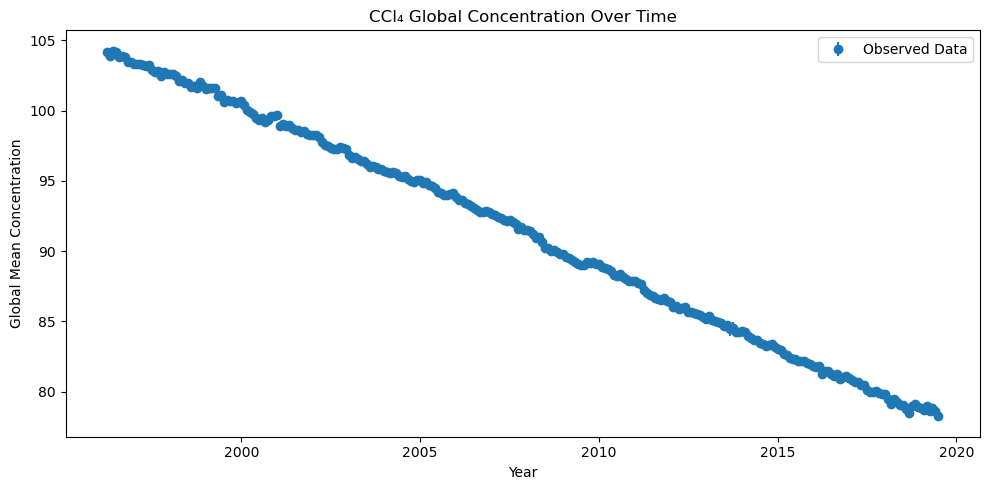

In [42]:
plt.figure(figsize=(10, 5))
plt.errorbar(df_gas['date'], df_gas['mean_conc'], yerr=df_gas['std_dev'], fmt='o', label="Observed Data")
plt.xlabel("Year")
plt.ylabel("Global Mean Concentration")
plt.title("CCl₄ Global Concentration Over Time")
plt.tight_layout()
plt.legend()
plt.show()


In [44]:
# Linear model
def linear(x, m, b):
    return m * x + b

init_guess = [0.1, df_gas['mean_conc'].mean()]
params_lin, cov_lin = curve_fit(linear, df_gas['date'], df_gas['mean_conc'], sigma=df_gas['std_dev'])
errors_lin = np.sqrt(np.diag(cov_lin))

# Chi-squared
residuals = df_gas['mean_conc'] - linear(df_gas['date'], *params_lin)
chi_squared = np.sum((residuals / df_gas['std_dev'])**2)
dof = len(df_gas) - len(params_lin)
chi_red = chi_squared / dof

# Print results
print("Linear Fit:")
print(f"Slope = {params_lin[0]:.4f} ± {errors_lin[0]:.4f}")
print(f"Intercept = {params_lin[1]:.4f} ± {errors_lin[1]:.4f}")
print(f"Equation: y = {params_lin[0]:.4f} * x + {params_lin[1]:.4f}")
print(f"Reduced Chi-squared: {chi_red:.2f}")


Linear Fit:
Slope = -1.1544 ± 0.0027
Intercept = 2409.2192 ± 5.4172
Equation: y = -1.1544 * x + 2409.2192
Reduced Chi-squared: 4.44


In [46]:
# Optional Comment
print("Does a linear model seem appropriate? It appears to capture the overall trend, "
      "though residual analysis could further confirm goodness of fit.")

# Bonus
print("\nCCl₄ (carbon tetrachloride) is a greenhouse gas and ozone-depleting substance. "
      "Its atmospheric levels reflect historic industrial use and later regulation.")


Does a linear model seem appropriate? It appears to capture the overall trend, though residual analysis could further confirm goodness of fit.

CCl₄ (carbon tetrachloride) is a greenhouse gas and ozone-depleting substance. Its atmospheric levels reflect historic industrial use and later regulation.
